<a href="https://colab.research.google.com/github/Pedro0974/AgendaPythonDjango/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando libs e dataset para projeto aprendizado
import pandas as pd
from sklearn.datasets import load_iris


In [ ]:
# retornando dados do dataset importado
data = load_iris()

In [ ]:
# transformando o data em um dataframe

iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# selecionando apenas colunas de pétala e os targets

iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]


In [ ]:
# separar x e y para grafico

X = iris1.drop('target', axis=1)
y = iris1.target

In [ ]:
# fazendo um train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

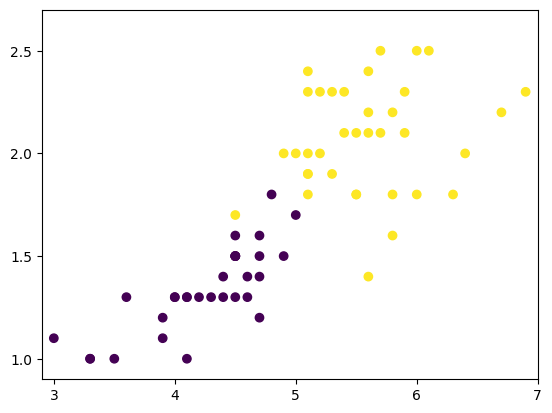

In [ ]:
# Criando vizualização dados de traino com matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    )

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.7), yticks=[1,1.5,2,2.5])

plt.show()


In [ ]:
# importando para utilizar a arvore de decisao do sklearn

from sklearn import tree

# criação do classificador de desição
clf = tree.DecisionTreeClassifier(random_state=42)

# fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [ ]:
# fazendo a verificação do score

clf.score(X_train, y_train)

1.0

[Text(0.6666666666666666, 0.9, 'x[0] <= 5.05\ngini = 0.497\nsamples = 67\nvalue = [31, 36]'),
 Text(0.5, 0.7, 'x[1] <= 1.9\ngini = 0.161\nsamples = 34\nvalue = [31, 3]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.5, 0.3, 'x[0] <= 4.65\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]')]

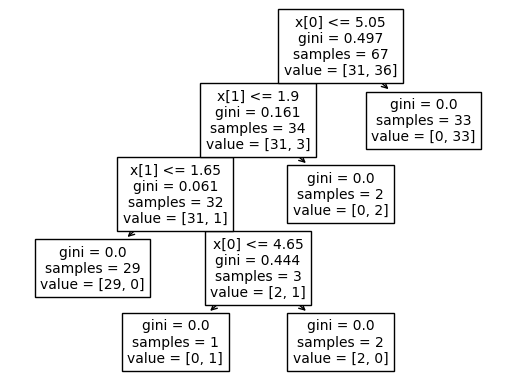

In [ ]:
# Criando a vizualização dessa arvore
tree.plot_tree(clf)

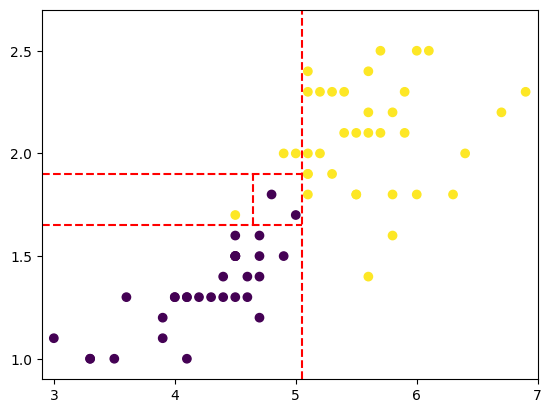

In [ ]:
# mostrando a arvore representada no grafico

fig, ax = plt.subplots()

ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    )

# ax.plot([1,5], [0.8,0.8], '--r')

ax.plot([5.05,5.05], [0.9,2.7], '--r' )
ax.plot([2.9,5.05], [1.9,1.9], '--r' )
ax.plot([2.9,5.05], [1.65,1.65], '--r' )
ax.plot([4.65,4.65], [1.65,1.9], '--r' )

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [ ]:
# fazendo a previsao pro dados de teste
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 6,  8]])

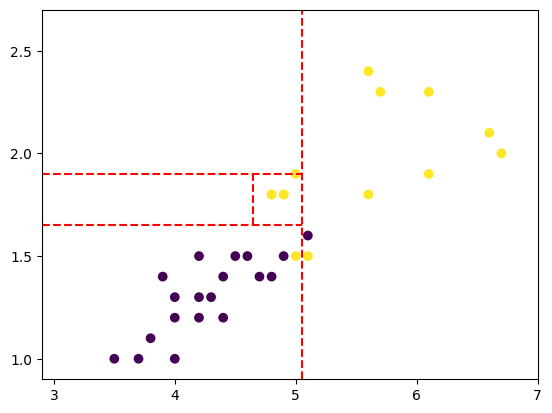

In [ ]:
# mostrando o grafico com o teste

fig, ax = plt.subplots()

ax.scatter(
    X_test['petal length (cm)'],
    X_test['petal width (cm)'],
    c=y_test,
    )

# ax.plot([1,5], [0.8,0.8], '--r')

ax.plot([5.05,5.05], [0.9,2.7], '--r' )
ax.plot([2.9,5.05], [1.9,1.9], '--r' )
ax.plot([2.9,5.05], [1.65,1.65], '--r' )
ax.plot([4.65,4.65], [1.65,1.9], '--r' )

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [ ]:
# Fazendo pra base completa

X = iris.drop('target', axis=1)
y = iris.target

In [ ]:
# criando o train_test_split para base completa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# criando novo classificador para base completa

clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
# Verificando score do novo classificador

clf2.score(X_train, y_train)

1.0

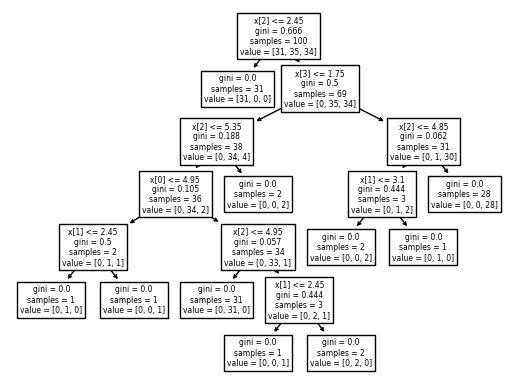

In [ ]:
# vizualizando a arvore da base completea

fig, ax = plt.subplots()

tree.plot_tree(clf2)

plt.show()

In [ ]:
# fazendo a previsao da base completa

y_pred2 = clf2.predict(X_test)

In [ ]:
# Avaliando modelo

confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])